### Load the Data
The dataset is loaded from the provided URL


In [1]:
import pandas as pd

#url for loading data
url = 'https://cocl.us/concrete_data'
data = pd.read_csv(url)

data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Data Preprocessing
the predictors are separated from the target variable. We then normalize the data using standard scaler


In [2]:
# Separate predictors and target
X = data.drop('Strength', axis=1)
y = data['Strength']

# Normalize the predictors
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Build the Base Model
We define function to build keras regression model with specified hidden layers. This allows for easy experimentation



In [3]:
from keras.models import Sequential
from keras.layers import Dense

# Define a function to build a regression model
def build_model(hidden_layers=1):
    model = Sequential()
    # 10 neurons and activation function relu to avoid vanishing gradient problem
    model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
    
    # we iterate over hidden layers 
    for _ in range(hidden_layers):
        model.add(Dense(10, activation='relu'))
    
    model.add(Dense(1))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


2024-10-08 14:12:12.648654: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-08 14:12:12.652026: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-08 14:12:12.660984: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-08 14:12:12.675866: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-08 14:12:12.681762: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-08 14:12:12.697042: I tensorflow/core/platform/cpu_feature_gu

### Train the Model with Different Epochs
The model is trained using a specific number of epochs. Additional experiments are there with different epochs. Epoch --> model goes through entire dataset .


In [4]:
# Build the model
model = build_model(hidden_layers=1)

# Train the model with a specified number of epochs
history = model.fit(X_scaled, y, epochs=50, batch_size=10, validation_split=0.2, verbose=1)


Epoch 1/50


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1635.2312 - val_loss: 1166.6121
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1457.6232 - val_loss: 1051.6274
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1315.4918 - val_loss: 858.1740
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1067.3788 - val_loss: 629.5264
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 674.2145 - val_loss: 468.5630
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 389.8680 - val_loss: 360.9232
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 328.0001 - val_loss: 300.7449
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 221.4254 - val_loss: 269.3589
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 199.9407 - val_loss: 258.3739
Epoch 10/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 175.3326 - val_loss: 252.9999
Epoch 11/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 174.6590 - val_loss: 249.0829
Epoch 12/50
83/83 ━━━━━━━━━━━━━━━━━

In [5]:
# Try with 2 hidden layers
model_2_layers = build_model(hidden_layers=2)
history_2_layers = model_2_layers.fit(X_scaled, y, epochs=50, batch_size=10, validation_split=0.2, verbose=1)


Epoch 1/50


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1666.3334 - val_loss: 1198.1628
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1578.9569 - val_loss: 1078.1426
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1250.2063 - val_loss: 761.1449
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 560.1128 - val_loss: 404.0815
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 260.4691 - val_loss: 328.5458
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 224.5381 - val_loss: 282.3333
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 207.4297 - val_loss: 257.8182
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 202.0576 - val_loss: 241.2656
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 186.5722 - val_loss: 227.7020
Epoch 10/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 165.5437 - val_loss: 214.1599
Epoch 11/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 152.9792 - val_loss: 204.9697
Epoch 12/50
83/83 ━━━━━━━━━━━━━━━━━━

### Evaluation and Comparison
We plot and see how both validation and training loss decreases for each epoch for each hidden layer configurations


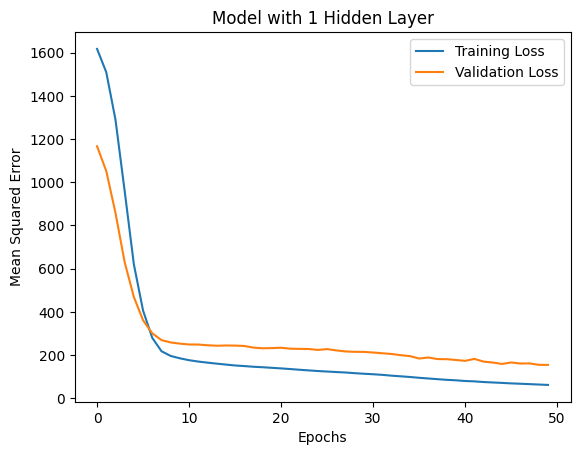

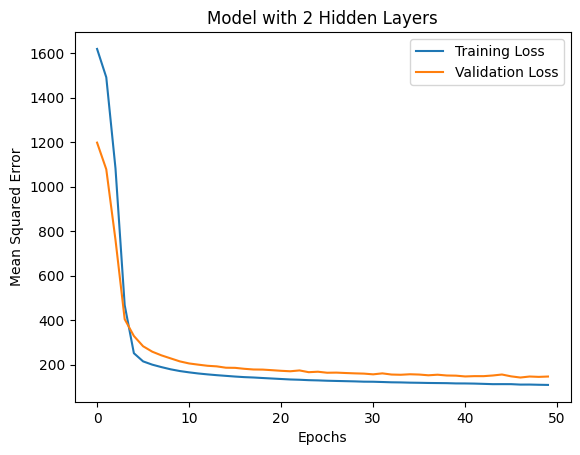

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation loss
def plot_history(history, title='Model Loss'):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

# Compare the model with 1 and 2 hidden layers
plot_history(history, 'Model with 1 Hidden Layer')
plot_history(history_2_layers, 'Model with 2 Hidden Layers')
